In [1]:
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cols_df = pd.read_csv('healthy_top10_new.csv', index_col=0)
cols = list(cols_df.columns[:-1])

In [3]:
cols

['cg16984944',
 'cg24046474',
 'cg15361750',
 'cg17274064',
 'cg07979752',
 'cg10637955',
 'cg26079320',
 'cg13150977',
 'cg26149738',
 'cg17142470']

In [5]:
print(diab.shape)

(5, 100, 100)


In [16]:
NUM_METHYL_BUCKETS = 100
buckets = [
    (8/NUM_METHYL_BUCKETS * i - 4, 8/NUM_METHYL_BUCKETS * (i+1) - 4) for i in range(NUM_METHYL_BUCKETS)
]

cg16984944


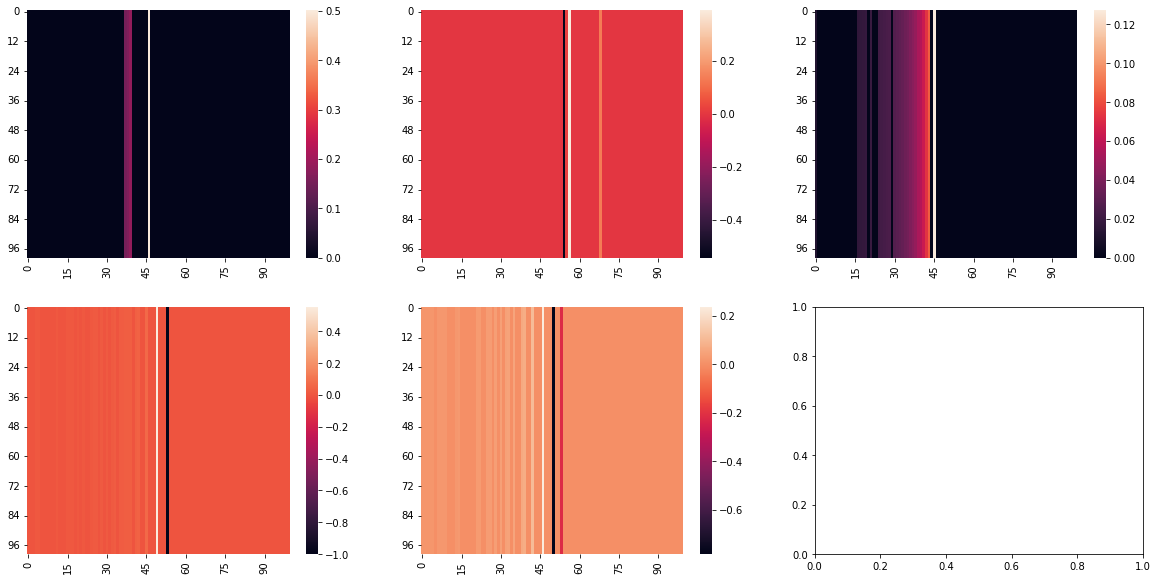

cg24046474


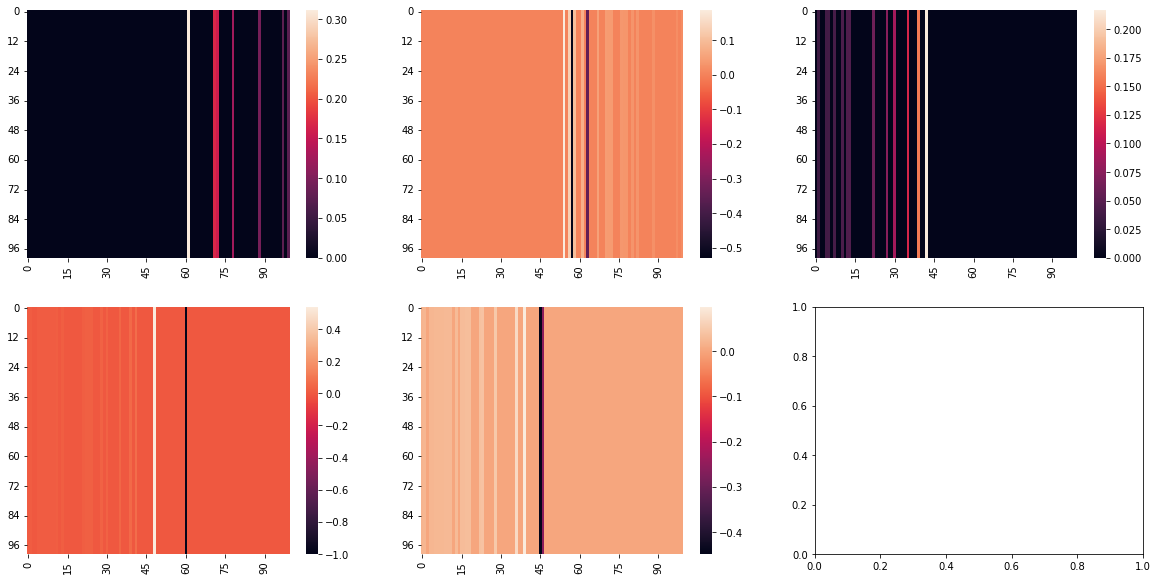

cg15361750


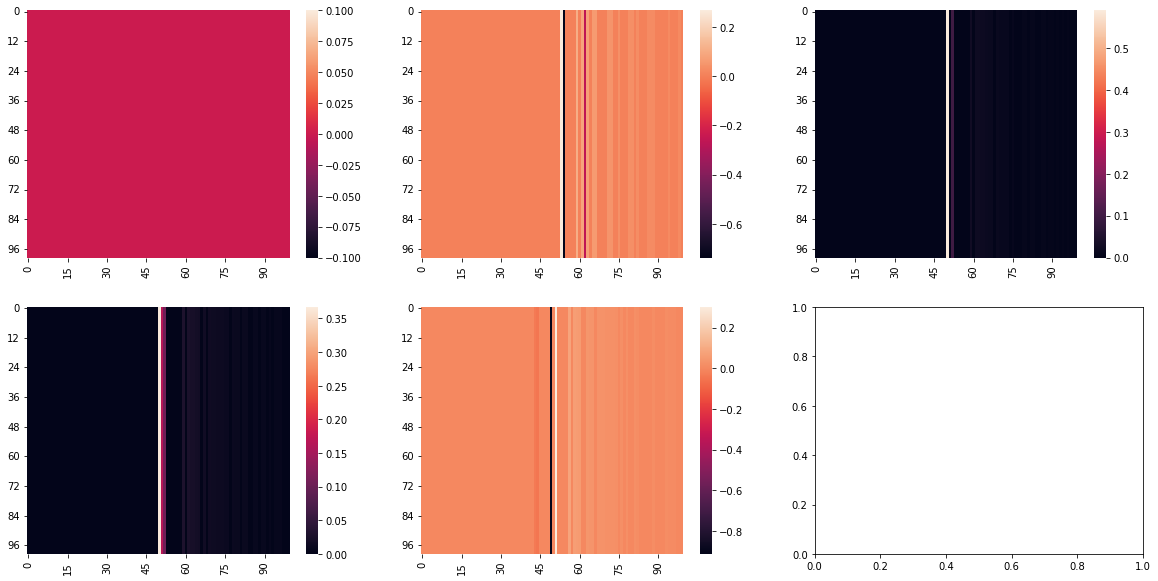

cg17274064


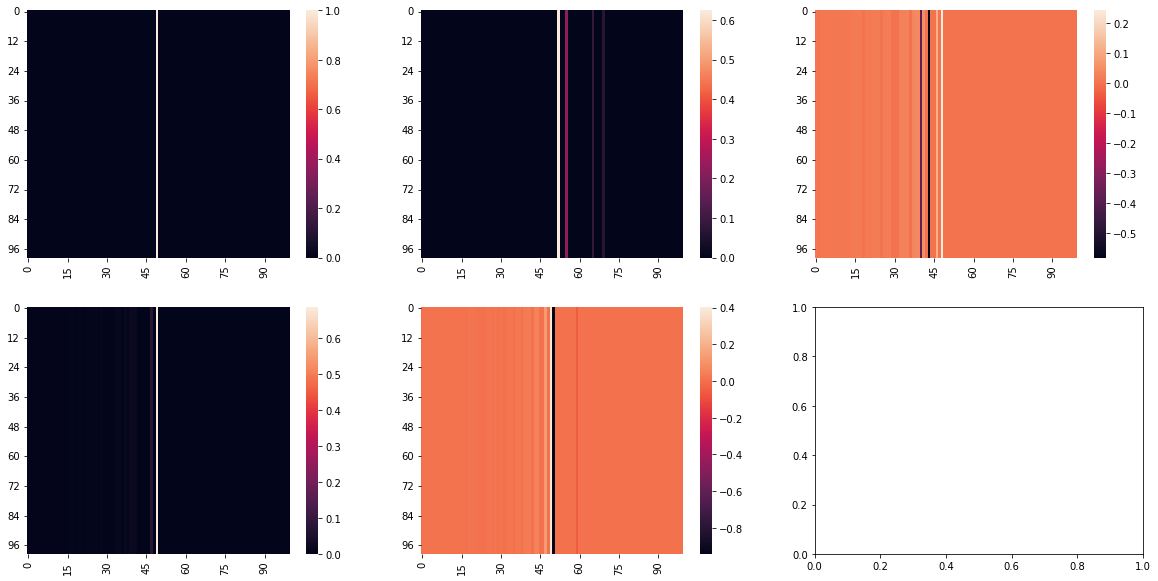

cg07979752


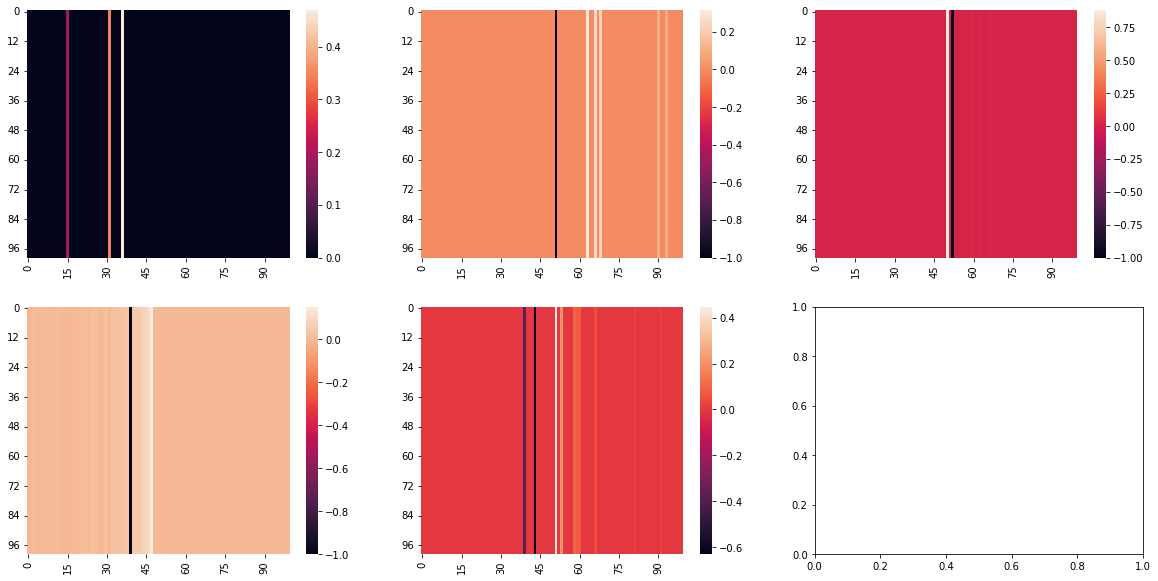

cg10637955


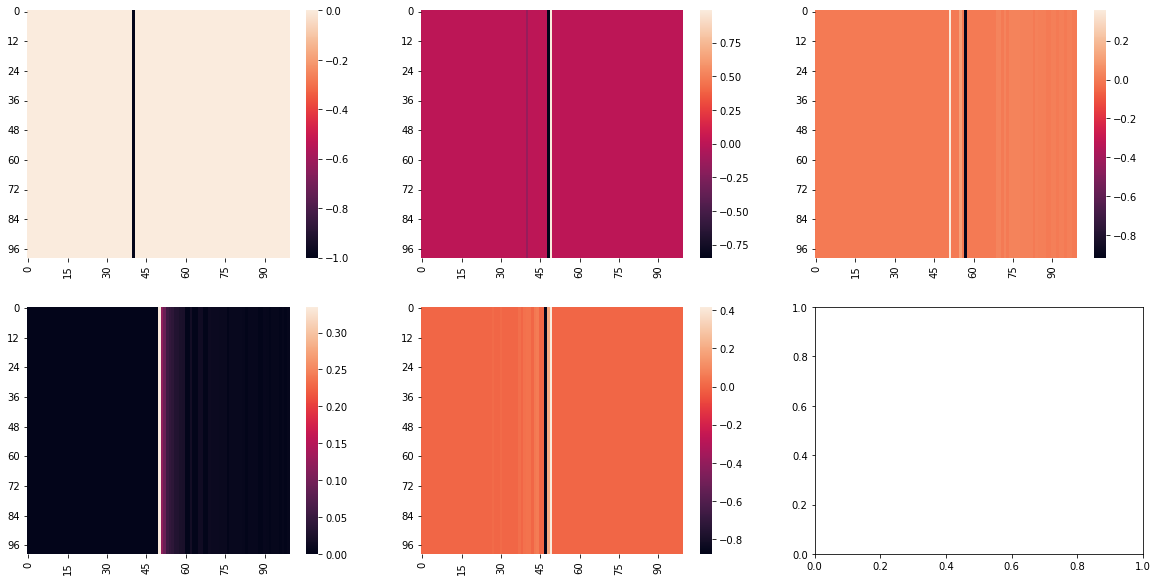

cg26079320


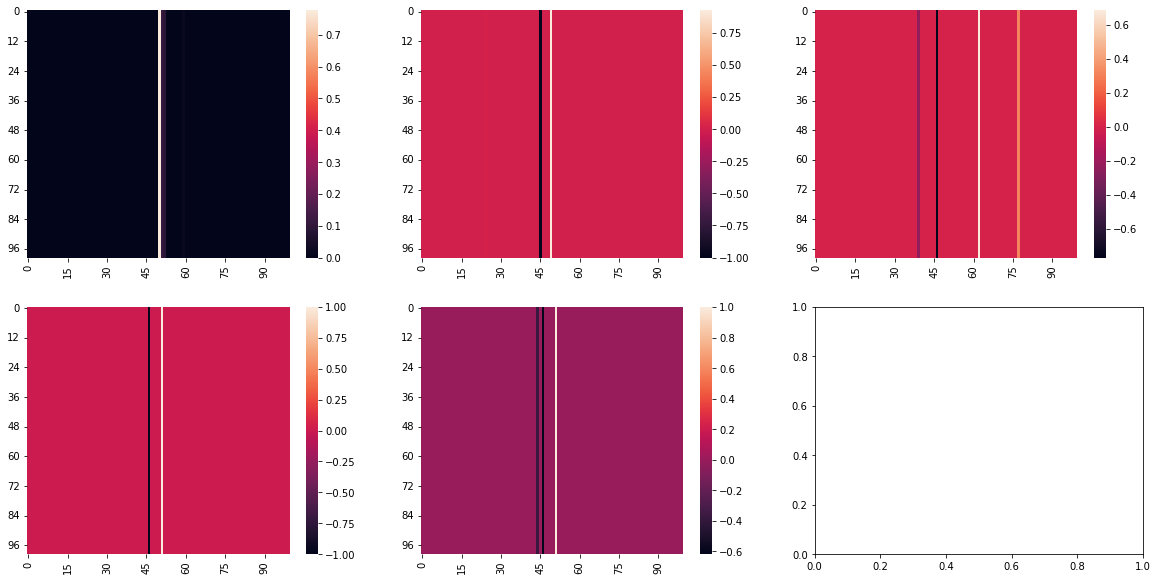

cg13150977


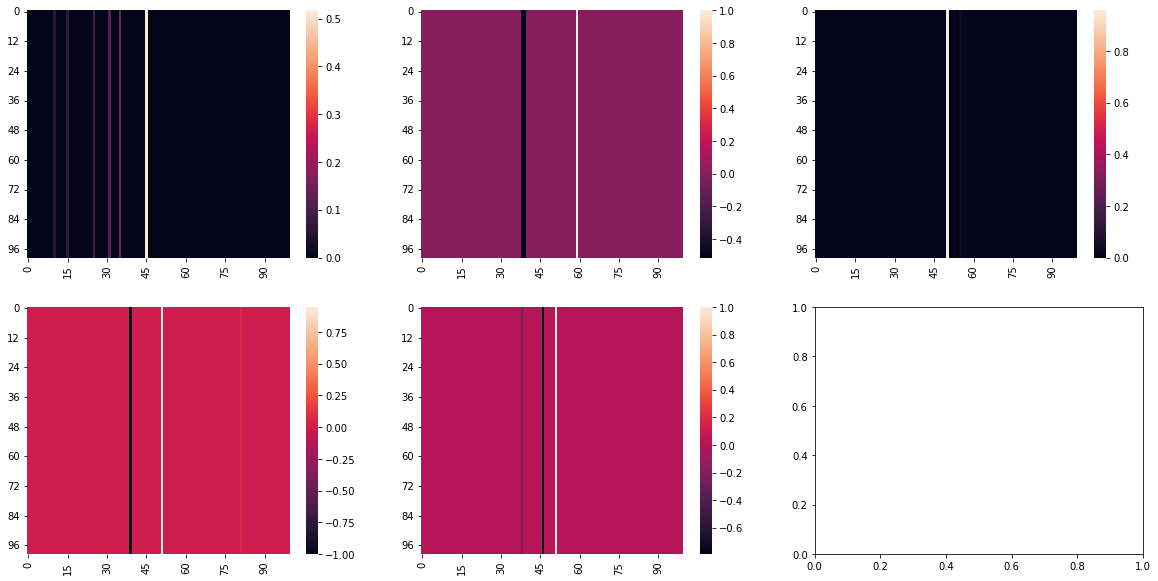

cg26149738


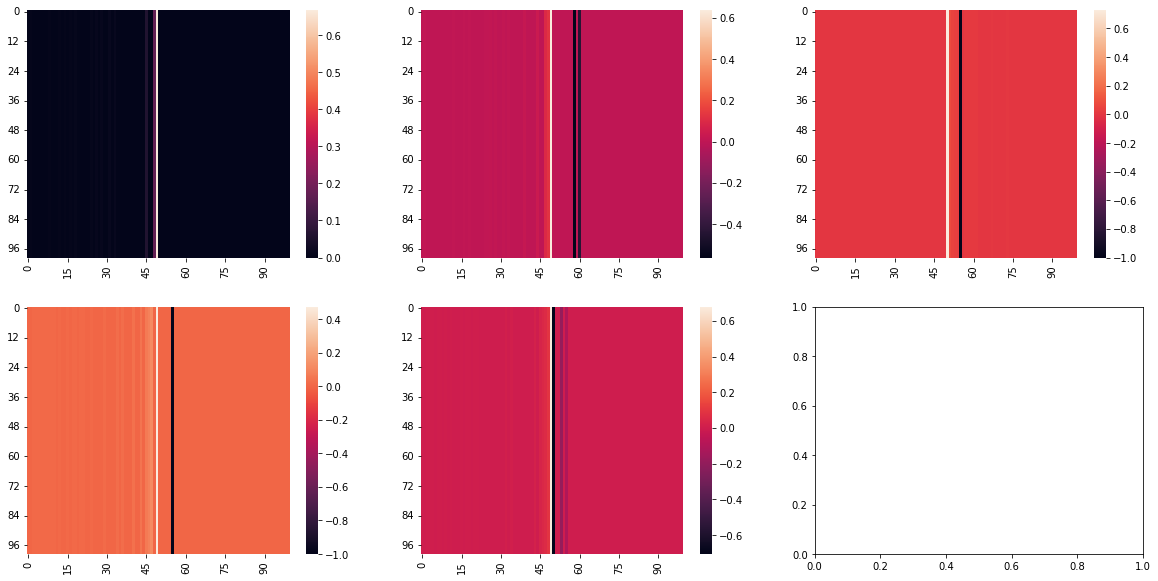

cg17142470


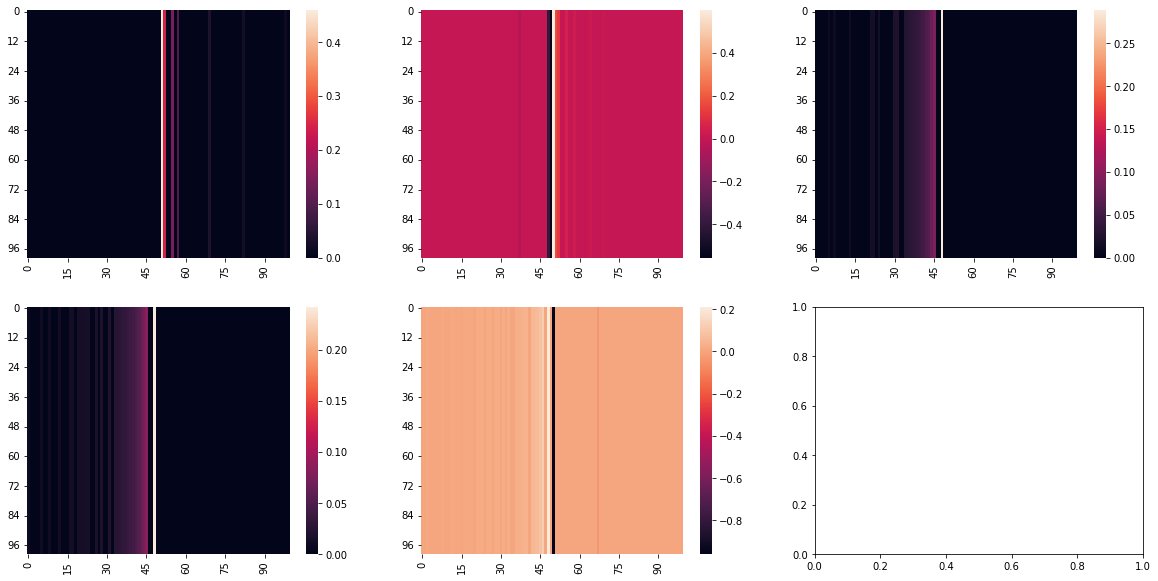

In [20]:
CPG_DICT = {}

NUM_AGE_BUCKETS = 5
for col in cols:
    print(col)
    df_diab = pd.read_csv(f'df_transition_disease_post_prune_{col}.csv', index_col=0)
    diab = np.array([[ast.literal_eval(x) for x in y] for y in df_diab.to_numpy()])
    diab[diab < 0] = 0
    summed = diab.sum(axis=2)
    summed[summed == 0] = 1
    diab = diab / summed[:,np.newaxis]

    df_healthy =  pd.read_csv(f'df_transition_healthy_post_prune_{col}.csv', index_col=0)
    healthy = np.array([[ast.literal_eval(x) for x in y] for y in df_healthy.to_numpy()])
    healthy[healthy < 0] = 0
    summed = healthy.sum(axis=2)
    summed[summed == 0] = 1
    healthy = healthy / summed[:,np.newaxis]
    
    err = healthy - diab
    
    fig, axs = plt.subplots(nrows=2, ncols=3)
    for i in range(NUM_AGE_BUCKETS):
        sns.heatmap(err[i], ax=axs[i//3][i%3])
    fig.set_size_inches(20, 10)
    plt.show()
    
    diabetic_list = {}
    healthy_list = {}
    for i in range(NUM_AGE_BUCKETS):
        healthy_list[i] = np.where(err[i][0] > 0.1)[0]
        diabetic_list[i] = np.where(err[i][0] < -0.1)[0]
    
    if col not in CPG_DICT:
        CPG_DICT[col] = {}
    
    for i in range(NUM_AGE_BUCKETS):
        if i not in CPG_DICT[col]:
            CPG_DICT[col][i] = {}
        for idx in healthy_list[i]:
            CPG_DICT[col][i][buckets[idx]] = err[i][0][idx]
        for idx in diabetic_list[i]:
            CPG_DICT[col][i][buckets[idx]] = err[i][0][idx]

In [23]:
for k in CPG_DICT.keys():
    print(CPG_DICT[k])
    print("\n\n")

{0: {(-1.04, -0.96): 0.15223609624255596, (-0.96, -0.8799999999999999): 0.16293458764934712, (-0.8799999999999999, -0.7999999999999998): 0.183840791959947, (-0.31999999999999984, -0.23999999999999977): 0.5009885241481501}, 1: {(0.4800000000000004, 0.5600000000000005): 0.39037538238864833, (1.4400000000000004, 1.5200000000000005): 0.13465720951355067, (0.3200000000000003, 0.40000000000000036): -0.5432918133756863}, 2: {(-0.3999999999999999, -0.31999999999999984): 0.127078202461335}, 3: {(-0.08000000000000007, 0.0): 0.5522798595303037, (0.2400000000000002, 0.3200000000000003): -1.0}, 4: {(-0.6400000000000001, -0.56): 0.10707113430608196, (-0.31999999999999984, -0.23999999999999977): 0.23564429573263196, (0.0, 0.08000000000000007): -0.7821861858431841, (0.2400000000000002, 0.3200000000000003): -0.21781381415681583}}



{0: {(0.8799999999999999, 0.96): 0.31095712565028866, (1.6799999999999997, 1.7599999999999998): 0.1687047359487461, (1.7599999999999998, 1.8399999999999999): 0.157226283487

In [38]:
np.save('CPG_DICT_TO_PLOT.npy', CPG_DICT)

In [37]:
np.load('CPG_DICT_TO_PLOT.npy', allow_pickle='TRUE').item()

{'cg16984944': {0: {(-1.04, -0.96): 0.15223609624255596,
   (-0.96, -0.8799999999999999): 0.16293458764934712,
   (-0.8799999999999999, -0.7999999999999998): 0.183840791959947,
   (-0.31999999999999984, -0.23999999999999977): 0.5009885241481501},
  1: {(0.4800000000000004, 0.5600000000000005): 0.39037538238864833,
   (1.4400000000000004, 1.5200000000000005): 0.13465720951355067,
   (0.3200000000000003, 0.40000000000000036): -0.5432918133756863},
  2: {(-0.3999999999999999, -0.31999999999999984): 0.127078202461335},
  3: {(-0.08000000000000007, 0.0): 0.5522798595303037,
   (0.2400000000000002, 0.3200000000000003): -1.0},
  4: {(-0.6400000000000001, -0.56): 0.10707113430608196,
   (-0.31999999999999984, -0.23999999999999977): 0.23564429573263196,
   (0.0, 0.08000000000000007): -0.7821861858431841,
   (0.2400000000000002, 0.3200000000000003): -0.21781381415681583}},
 'cg24046474': {0: {(0.8799999999999999, 0.96): 0.31095712565028866,
   (1.6799999999999997, 1.7599999999999998): 0.16870473

In [36]:
healthy[0].shape

(40, 40)

In [38]:
pd.DataFrame(healthy[0])

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.0,0.0,0.0,0.0,0.0,0.214697,0.265044,0.389326,0.558712,1.318426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.214697,0.265044,0.389326,0.558712,1.318426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.214697,0.265044,0.389326,0.558712,1.318426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.214697,0.265044,0.389326,0.558712,1.318426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.214697,0.265044,0.389326,0.558712,1.318426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.214697,0.265044,0.389326,0.558712,1.318426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.214697,0.265044,0.389326,0.558712,1.318426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.214697,0.265044,0.389326,0.558712,1.318426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.214697,0.265044,0.389326,0.558712,1.318426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.214697,0.265044,0.389326,0.558712,1.318426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
state_diab = pd.read_csv('df_state_disease_post_prune.csv', index_col=0)
diab_state = np.array([[ast.literal_eval(x) for x in y] for y in state_diab.to_numpy()])

state_healthy =  pd.read_csv('df_state_healthy_post_prune.csv', index_col=0)
healthy_state = np.array([[ast.literal_eval(x) for x in y] for y in state_healthy.to_numpy()])

In [7]:
df_diab = pd.read_csv('df_transition_disease_post_prune.csv', index_col=0)
diab = np.array([[ast.literal_eval(x) for x in y] for y in df_diab.to_numpy()])
diab[diab < 0] = 0

df_healthy =  pd.read_csv('df_transition_healthy_post_prune.csv', index_col=0)
healthy = np.array([[ast.literal_eval(x) for x in y] for y in df_healthy.to_numpy()])
healthy[healthy < 0] = 0

In [8]:
healthy.shape

(5, 40, 40)

In [9]:
err = healthy - diab

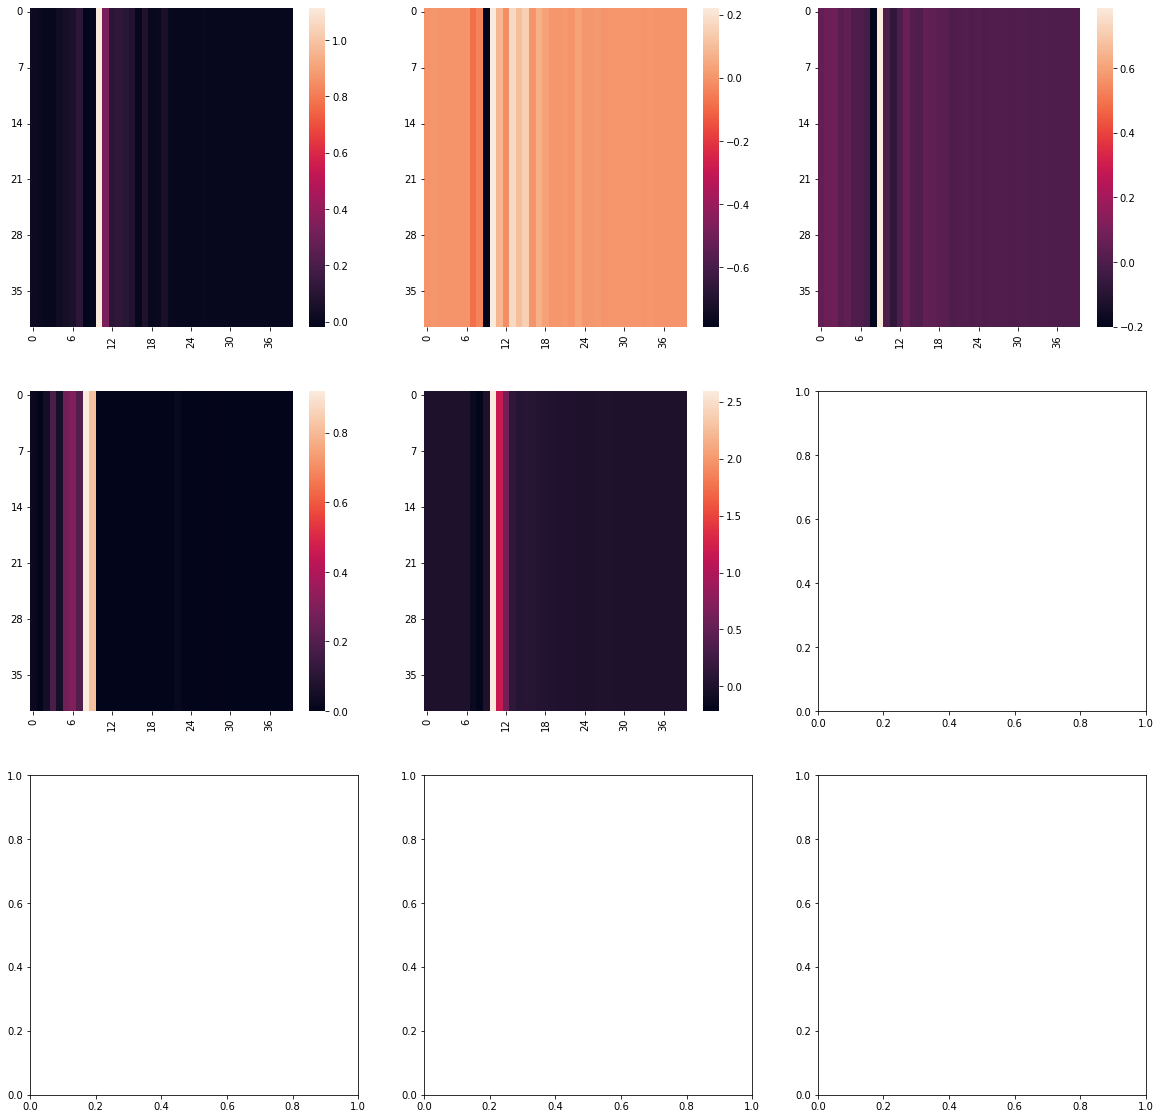

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=3)
for i in range(5):
    sns.heatmap(err[i], ax=axs[i//3][i%3])
fig.set_size_inches(20, 20)
plt.show()

In [35]:
np.argsort(err[1][0])

array([ 7, 34, 23, 18, 39, 47,  2, 44,  5, 22, 26, 27, 33,  0, 37, 40, 43,
       46, 36, 20, 24, 49, 11, 19, 12, 13,  8,  6,  4,  9,  3, 14, 15,  1,
       16, 17, 10, 48, 29, 21, 41, 45, 31, 38, 32, 25, 30, 35, 28, 42])

In [37]:
err[1][0, [30, 35, 28, 42]]

array([0.13793134, 0.18876971, 0.21154363, 0.27491619])

In [39]:
np.where(err[1][0] > 0.1)[0]

array([28, 30, 35, 42])

In [44]:
diabetic_list = {}
healthy_list = {}
for i in range(9):
    diabetic_list[i] = np.where(err[i][0] > 0.05)[0]
    healthy_list[i] = np.where(err[i][0] < -0.05)[0]

In [45]:
diabetic_list

{0: array([31, 44, 48]),
 1: array([28, 30, 35, 42]),
 2: array([15]),
 3: array([27, 40]),
 4: array([40]),
 5: array([ 5, 10, 11, 39]),
 6: array([], dtype=int64),
 7: array([], dtype=int64),
 8: array([3])}

In [46]:
healthy_list

{0: array([], dtype=int64),
 1: array([ 7, 23, 34]),
 2: array([ 2, 13, 18, 23, 26, 28, 34, 39, 44, 47]),
 3: array([], dtype=int64),
 4: array([], dtype=int64),
 5: array([], dtype=int64),
 6: array([], dtype=int64),
 7: array([], dtype=int64),
 8: array([ 5,  7, 10, 13, 15, 18, 21, 26, 28, 34])}